In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the CSV file 'spending_data.csv' using Latin-1 encoding and display a random sample of 20 rows
df = pd.read_csv('spending_data.csv', encoding='latin1')
df.sample(20)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
4183,18788.993738,59,3,Professional,Tier_2,3757.798748,0.000000,733.905627,1988.968786,1447.434994,...,1254.284273,5879.281168,385.071741,267.147404,51.259284,50.363235,278.281820,26.119872,29.849061,60.109281
19240,59770.753626,47,0,Retired,Tier_2,11954.150725,0.000000,2280.800883,8576.018121,4066.646639,...,8557.453197,21825.699014,1032.133553,690.134079,415.685094,501.157367,452.982471,62.393582,0.000000,420.585482
7552,8852.855083,19,2,Student,Tier_1,2655.856525,1369.956928,386.103363,1097.918062,681.940722,...,118.830916,118.830916,130.022456,158.085916,56.709449,68.966106,157.252468,2.629307,8.606364,18.768336
17403,24357.819138,22,3,Retired,Tier_1,7307.345741,0.000000,969.168960,2909.042137,1309.246617,...,2019.019963,4995.761645,827.600556,78.552405,63.208766,162.558271,93.980413,56.007795,39.650182,42.765385
18425,32412.687770,33,2,Self_Employed,Tier_3,4861.903165,0.000000,1057.745382,3616.283026,1868.907818,...,2624.114039,13027.949304,348.336597,403.653719,114.437423,234.359011,467.986601,69.162679,53.385861,109.291330
8547,77035.945445,33,3,Professional,Tier_2,15407.189089,0.000000,2307.717480,7771.358513,5279.407855,...,9151.543664,25413.835979,1728.418435,592.902834,464.687383,577.903128,737.546099,70.538115,266.647215,157.433549
14524,79842.912414,47,2,Professional,Tier_1,23952.873724,13030.111617,1870.676972,8500.851599,5885.149425,...,3961.123717,3961.123717,946.851822,1691.742668,449.588628,105.993998,1329.291826,176.972909,224.808864,418.976029
12625,42284.857182,52,3,Professional,Tier_2,8456.971436,5084.625811,1086.563109,4729.939190,2743.825199,...,4603.909090,7998.043548,798.623264,542.642527,429.795433,261.392819,664.319165,55.966062,99.783997,271.642760
13649,48864.316079,18,4,Self_Employed,Tier_2,9772.863216,6018.768721,2351.123163,6464.292502,3199.414868,...,5481.253457,9101.338621,1292.250086,367.007288,188.517108,126.501058,185.768336,47.023386,6.194578,297.820757
7334,36402.557709,23,1,Self_Employed,Tier_3,5460.383656,0.000000,1008.328704,4876.830377,2768.255949,...,2431.814525,11896.789392,737.712611,498.911407,269.271639,274.292190,765.584468,50.072877,43.201464,96.114070


## STARTING DATA CLEANING

In [3]:
# Display a summary of the DataFrame including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [4]:
# Generate descriptive statistics for numerical columns (count, mean, std, min, max, etc.)
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,...,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,...,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


### EXPLATORY DATA ANALYSIS

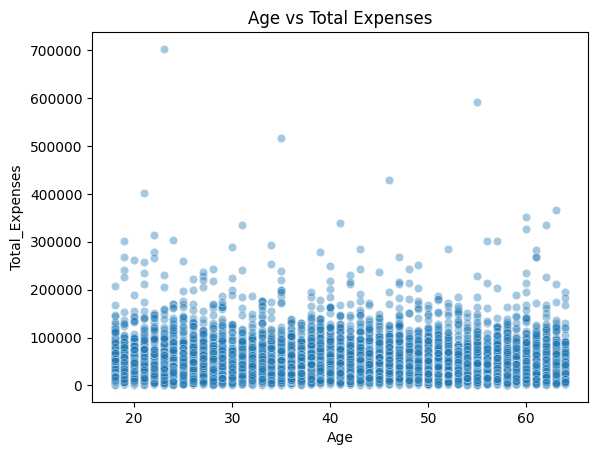

In [55]:
# Calculate total expenses by summing selected expense columns row-wise
expense_cols = ['Rent','Loan_Repayment','Insurance','Groceries','Transport','Eating_Out',
                'Entertainment','Utilities','Healthcare','Education','Miscellaneous']
df["Total_Expenses"] = df[expense_cols].sum(axis=1)
# Create a scatter plot to visualize the relationship between Age and Total Expenses
sns.scatterplot(data=df, x="Age", y="Total_Expenses", alpha=0.4)
plt.title("Age vs Total Expenses")
plt.show()

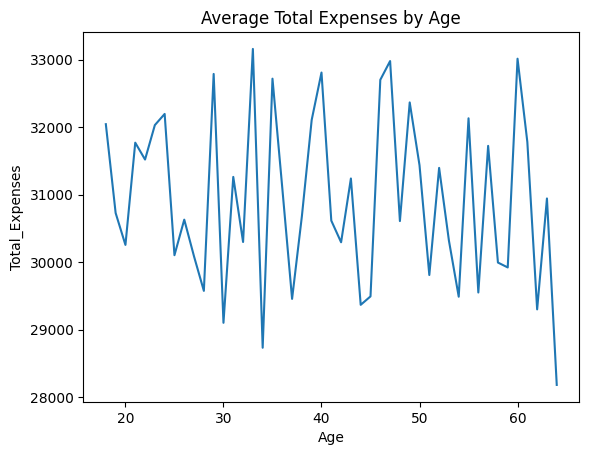

In [6]:
# Group the data by Age and calculate the average total expenses for each age
age_grouped = df.groupby("Age")["Total_Expenses"].mean().reset_index()
# Create a line plot to show how average total expenses vary with age
sns.lineplot(data=age_grouped, x="Age", y="Total_Expenses")
plt.title("Average Total Expenses by Age")
plt.show()


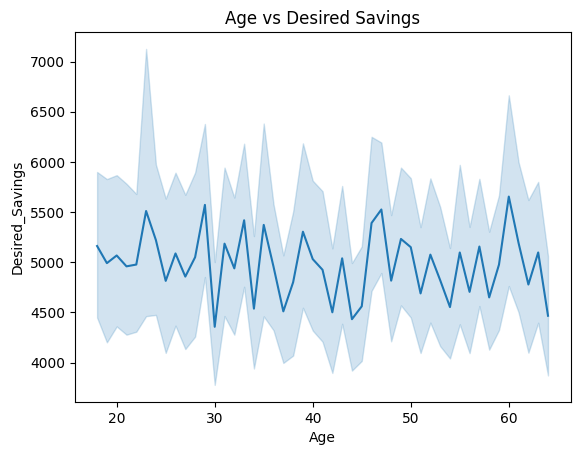

In [7]:
# Plot a line graph to visualize how desired savings vary with age
sns.lineplot(data=df.sort_values("Age"), x="Age", y="Desired_Savings")
plt.title("Age vs Desired Savings")
plt.show()

In [9]:
# Group the data by number of dependents and calculate the mean of 
# Desired Savings, Disposable Income, and Total Expenses for each group
dep_group = df.groupby("Dependents").agg({
    "Desired_Savings": "mean",
    "Disposable_Income": "mean",
    "Total_Expenses": "mean"
}).reset_index()

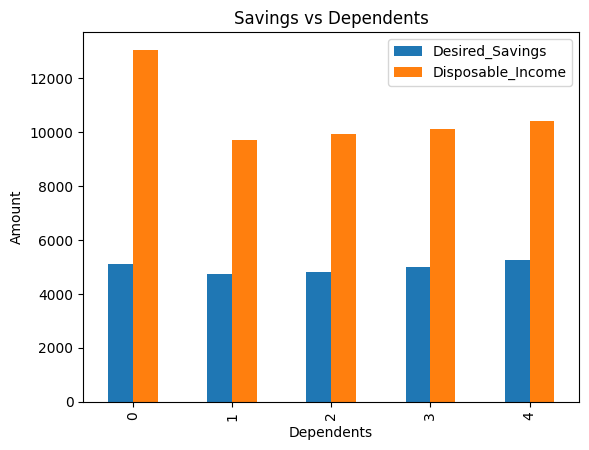

In [61]:
# Create a bar chart to compare average Desired Savings and Disposable Income across different numbers of dependents
dep_group.plot(x="Dependents", y=["Desired_Savings", "Disposable_Income"], kind="bar")
plt.title("Savings vs Dependents")
plt.ylabel("Amount")
plt.show()

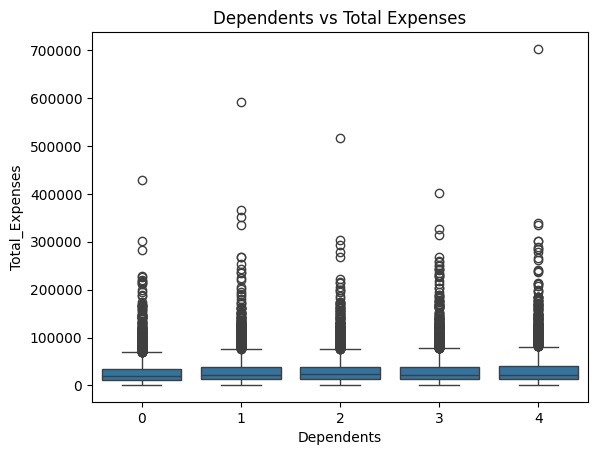

In [11]:
# Create a boxplot to show the distribution of total expenses for different numbers of dependents
sns.boxplot(data=df, x="Dependents", y="Total_Expenses")
plt.title("Dependents vs Total Expenses")
plt.show()

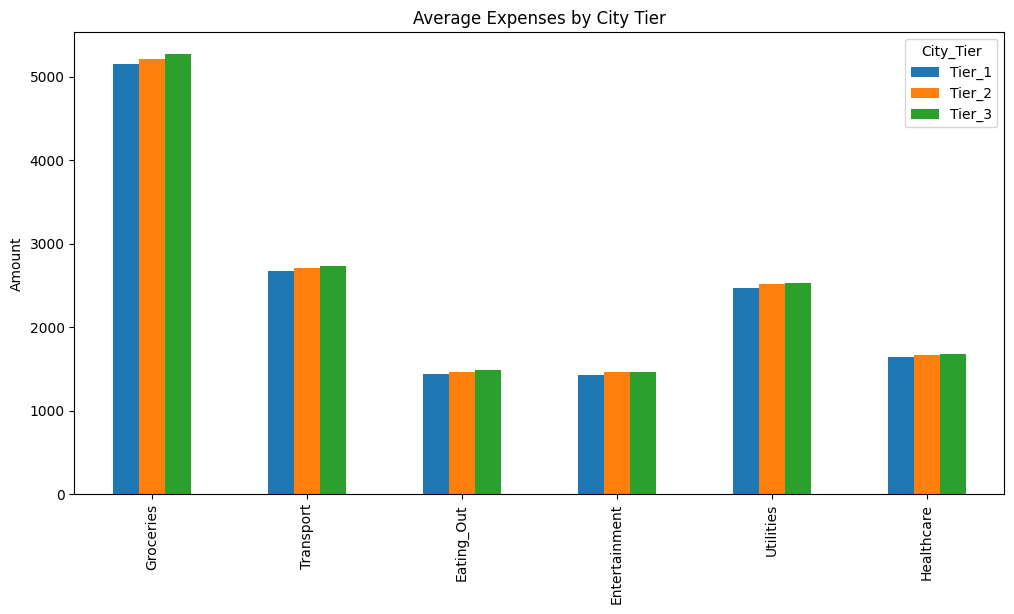

In [27]:
# Group the data by 'City_Tier' and calculate the mean for each expense column
expense_cols = ["Groceries", "Transport", "Eating_Out", "Entertainment", "Utilities", "Healthcare"]
city_exp = df.groupby("City_Tier")[expense_cols].mean().T
# Create a bar chart to compare average expenses across different city tierscity_exp.plot(kind='bar', figsize=(12, 6))
city_exp.plot(kind='bar', figsize=(12, 6))
plt.title("Average Expenses by City Tier")
plt.ylabel("Amount")
plt.show()

In [37]:
# For each occupation, find the top 3 expense categories based on spending by sorting the values in descending order
top3_per_occupation = occupation_spending.apply(lambda row: row.sort_values(ascending=False)[:3].index.tolist(), axis=1)
# Print the top 3 expense categories for each occupation
print(top3_per_occupation)

Occupation
Professional     [Groceries, Transport, Education]
Self_Employed    [Groceries, Transport, Utilities]
Student          [Groceries, Transport, Utilities]
Retired          [Groceries, Transport, Utilities]
dtype: object


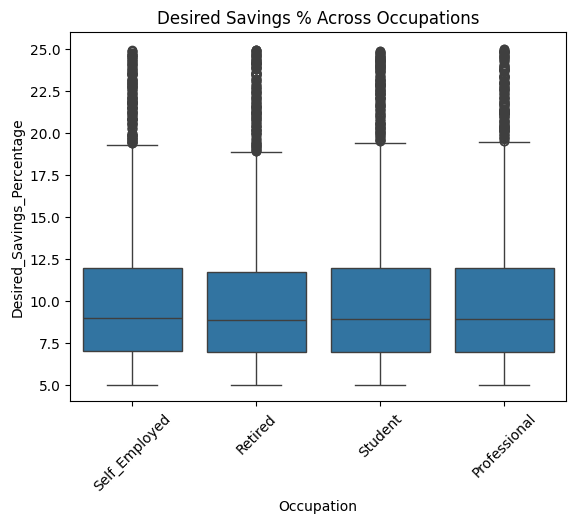

In [39]:
# Create a boxplot to visualize the distribution of desired savings percentage across different occupationssns.boxplot(data=df, x="Occupation", y="Desired_Savings_Percentage")
plt.xticks(rotation=45)
plt.title("Desired Savings % Across Occupations")
plt.show()